In [1]:
#import dependencies
import pandas as pd
import numpy as np
#import qgrid
#qgrid.set_grid_option('maxVisibleRows', 12)
#plotly dash
import matplotlib.pyplot as plt
#import ipywidgets as widgets
import plotly.plotly as py
import cufflinks as cf
from functools import reduce
#init_notebook_mode(connected=True)

In [2]:
#load Brutto_Sozialhilfe
df_Brutto_Sozialhilfe = pd.read_csv('Brutto_Sozialhilfe.csv')
df_Brutto_Sozialhilfe.set_index('GEMEINDE_NAME', inplace=True)
df_Brutto_Sozialhilfe.head()

,Key,BFS_NR_GEMEINDE,JAHR,ANZAHL_PERSONEN,Netto_Sozialhilfe_je_Einwohner,Netto_Ausgaben
GEMEINDE_NAME,,,,,,
Arbon,4401_2018,4401,2018,14533,428,CHF 6'220'124.00
Arbon,4401_2017,4401,2017,14430,502,CHF 7'243'860.00
Arbon,4401_2016,4401,2016,14256,438,CHF 6'244'128.00
Arbon,4401_2015,4401,2015,14184,448,CHF 6'354'432.00
Arbon,4401_2014,4401,2014,13986,341,CHF 4'769'226.00


In [3]:
#load Bev_Gemeinde_Total_2007_2018
#df_Netto_Sozialhilfe = pd.read_csv('Netto_Sozialhilfe.csv')
#df_Netto_Sozialhilfe.set_index('Jahr',inplace=True)
#df_Netto_Sozialhilfe.sort_values(by='Jahr', inplace=True)
#df_Netto_Sozialhilfe.head(3)

### Exploratory Data Analysis (EDA)

In [4]:
print ('Statistische Eigenschaften des Datensatzes:')
print ('')
print (df_Brutto_Sozialhilfe.describe())

Statistische Eigenschaften des Datensatzes:

       BFS_NR_GEMEINDE         JAHR  ANZAHL_PERSONEN  \
count       960.000000   960.000000       960.000000   
mean       4665.862500  2012.500000      3208.457292   
std         157.032896     3.453852      3988.760542   
min        4401.000000  2007.000000       292.000000   
25%        4542.750000  2009.750000      1214.500000   
50%        4676.000000  2012.500000      2058.500000   
75%        4793.500000  2015.250000      3308.750000   
max        4951.000000  2018.000000     25456.000000   

       Netto_Sozialhilfe_je_Einwohner  
count                      960.000000  
mean                        80.206250  
std                         68.473625  
min                        -80.000000  
25%                         36.000000  
50%                         70.000000  
75%                        112.250000  
max                        505.000000  


In [5]:
#Get the unique list of BFS_NR_GEMEINDE and names
print (df_Brutto_Sozialhilfe.BFS_NR_GEMEINDE.unique())
#print (df_Brutto_Sozialhilfe.GEMEINDE_NAME.unique())

[4401 4406 4411 4416 4421 4426 4431 4436 4441 4446 4451 4461 4471 4476
 4486 4495 4501 4506 4511 4536 4545 4546 4551 4561 4566 4571 4590 4591
 4601 4606 4611 4616 4621 4641 4643 4646 4651 4656 4666 4671 4681 4683
 4691 4696 4701 4711 4716 4721 4723 4724 4726 4741 4746 4751 4756 4761
 4776 4781 4786 4791 4801 4806 4811 4816 4821 4826 4831 4841 4846 4851
 4864 4871 4881 4891 4901 4911 4921 4941 4946 4951]


In [6]:
df_Brutto_Sozialhilfe['Netto_Ausgaben'] = df_Brutto_Sozialhilfe['Netto_Ausgaben'].map(lambda x: x.lstrip("-CHF").rstrip('aAbBcC'))
df_Brutto_Sozialhilfe['Netto_Ausgaben'] = df_Brutto_Sozialhilfe['Netto_Ausgaben'].map(lambda x: x.replace("'", ""))
#df_Brutto_Sozialhilfe.astype('int64')
df_Brutto_Sozialhilfe['Netto_Ausgaben'] = pd.to_numeric(df_Brutto_Sozialhilfe['Netto_Ausgaben'], errors='coerce')
df_Brutto_Sozialhilfe.head(3)
#df_Brutto_Sozialhilfe.loc[df_Brutto_Sozialhilfe['GEMEINDE_NAME'] == "Weinfelden"].head(3)
#df_Brutto_Sozialhilfe['Netto_Ausgaben'].loc[df_Brutto_Sozialhilfe['BFS_NR_GEMEINDE'] == 4406]

,Key,BFS_NR_GEMEINDE,JAHR,ANZAHL_PERSONEN,Netto_Sozialhilfe_je_Einwohner,Netto_Ausgaben
GEMEINDE_NAME,,,,,,
Arbon,4401_2018,4401,2018,14533,428,6220124.0
Arbon,4401_2017,4401,2017,14430,502,7243860.0
Arbon,4401_2016,4401,2016,14256,438,6244128.0


In [7]:
#Find the 5 largest and smallest Gemeinde (based on average habitants)
#to focus exploratory analysis and visualization on
#df = df_Brutto_Sozialhilfe.groupby("JAHR").mean()
df = df_Brutto_Sozialhilfe.groupby("GEMEINDE_NAME").mean()
df.sort_values(by='ANZAHL_PERSONEN', inplace=True)
df.head(3)

,BFS_NR_GEMEINDE,JAHR,ANZAHL_PERSONEN,Netto_Sozialhilfe_je_Einwohner,Netto_Ausgaben
GEMEINDE_NAME,,,,,
Gottlieben,4651.0,2012.5,315.666667,106.583333,36242.250000
Raperswilen,4846.0,2012.5,400.166667,76.000000,32040.083333
Sommeri,4446.0,2012.5,524.416667,78.583333,41682.916667


In [8]:
#Top5
Frauenfeld = df_Brutto_Sozialhilfe.loc[df_Brutto_Sozialhilfe['BFS_NR_GEMEINDE'] == 4566]
Kreuzlingen = df_Brutto_Sozialhilfe.loc[df_Brutto_Sozialhilfe['BFS_NR_GEMEINDE'] == 4671]
Arbon = df_Brutto_Sozialhilfe.loc[df_Brutto_Sozialhilfe['BFS_NR_GEMEINDE'] == 4401]
Amriswil = df_Brutto_Sozialhilfe.loc[df_Brutto_Sozialhilfe['BFS_NR_GEMEINDE'] == 4461]
Weinfelden = df_Brutto_Sozialhilfe.loc[df_Brutto_Sozialhilfe['BFS_NR_GEMEINDE'] == 4946]

### Frauenfeld

<Figure size 432x288 with 0 Axes>

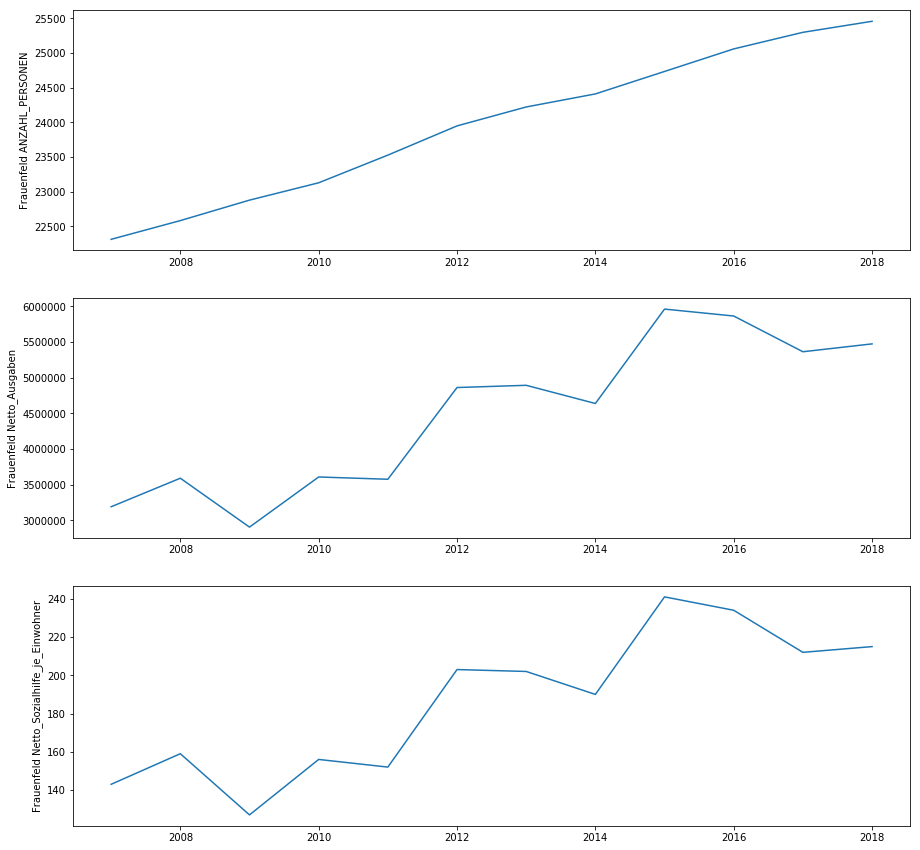

In [9]:
plt.figure();
f, axes = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(15)
axes[0].plot(Frauenfeld['JAHR'], Frauenfeld['ANZAHL_PERSONEN'])
axes[0].set_ylabel('Frauenfeld ANZAHL_PERSONEN');

axes[1].plot(Frauenfeld['JAHR'], Frauenfeld['Netto_Ausgaben'])
axes[1].set_ylabel('Frauenfeld Netto_Ausgaben');

axes[2].plot(Frauenfeld['JAHR'], Frauenfeld['Netto_Sozialhilfe_je_Einwohner'])
axes[2].set_ylabel('Frauenfeld Netto_Sozialhilfe_je_Einwohner');

In [10]:
Frauenfeld.rename(columns={'Key':'Frauenfeld_Key',
                           'BFS_NR_GEMEINDE':'Frauenfeld_BFS_NR_GEMEINDE',
                            'ANZAHL_PERSONEN':'Frauenfeld_ANZAHL_PERSONEN',
                            'Netto_Sozialhilfe_je_Einwohner':'Frauenfeld_Netto_Sozialhilfe_je_Einwohner',
                            'Netto_Ausgaben':'Frauenfeld_Netto_Ausgaben'
                           }, inplace=True)
Frauenfeld.sort_values(by='JAHR', inplace=True)
Frauenfeld.set_index('JAHR', inplace=True)

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



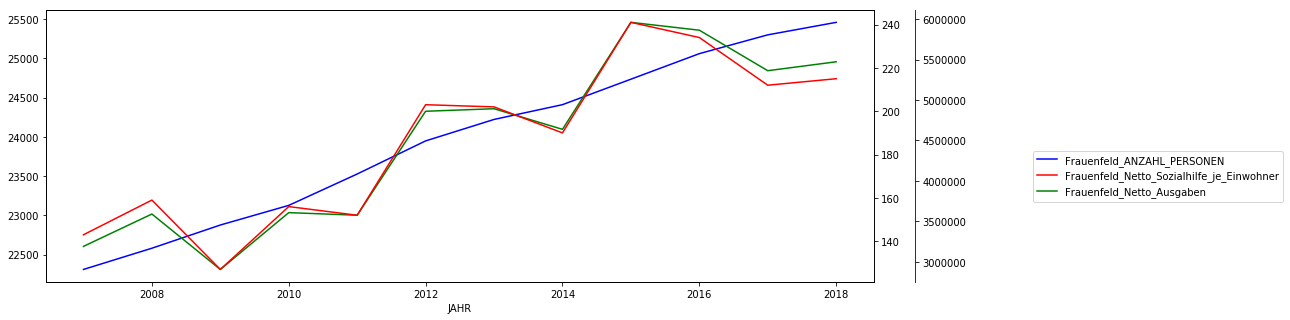

In [11]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(20)
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

Frauenfeld.Frauenfeld_ANZAHL_PERSONEN.plot(x='JAHR', ax=ax, style='b-')
# same ax as above since it's automatically added on the right
Frauenfeld.Frauenfeld_Netto_Sozialhilfe_je_Einwohner.plot(x='JAHR', ax=ax, style='r-', secondary_y=True)
Frauenfeld.Frauenfeld_Netto_Ausgaben.plot(x='JAHR', ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['Frauenfeld_ANZAHL_PERSONEN','Frauenfeld_Netto_Sozialhilfe_je_Einwohner','Frauenfeld_Netto_Ausgaben'], bbox_to_anchor=(1.5, 0.5))

### Kreuzlingen

<Figure size 432x288 with 0 Axes>

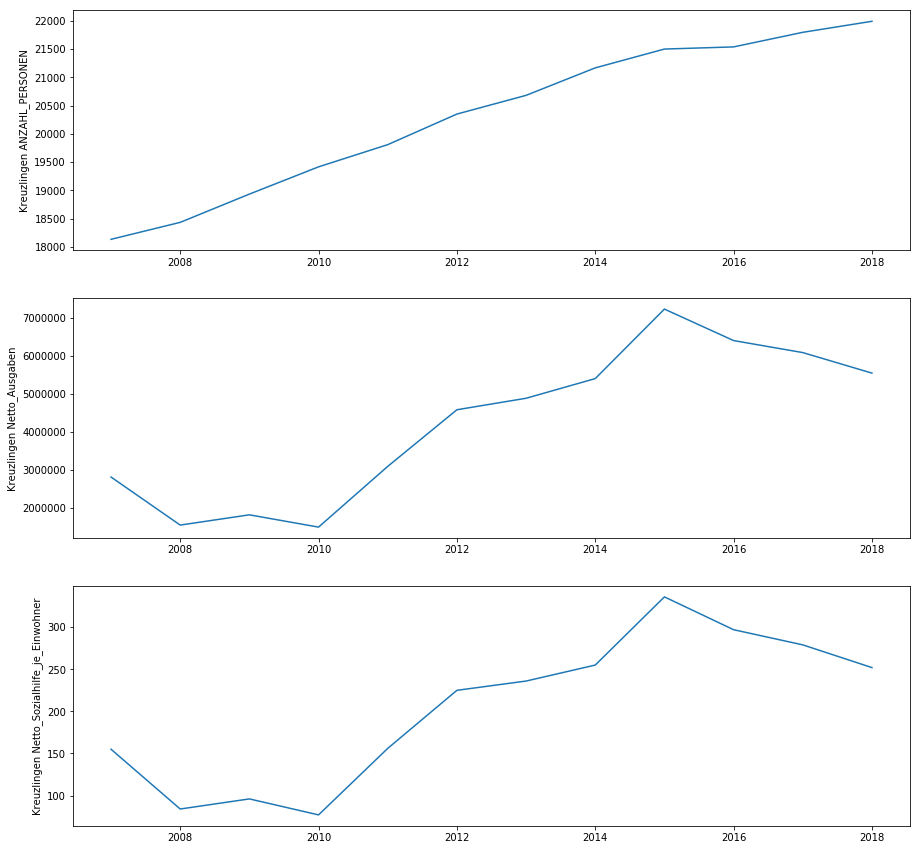

In [12]:
plt.figure();
f, axes = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(15)
axes[0].plot(Kreuzlingen['JAHR'], Kreuzlingen['ANZAHL_PERSONEN'])
axes[0].set_ylabel('Kreuzlingen ANZAHL_PERSONEN');

axes[1].plot(Kreuzlingen['JAHR'], Kreuzlingen['Netto_Ausgaben'])
axes[1].set_ylabel('Kreuzlingen Netto_Ausgaben');

axes[2].plot(Kreuzlingen['JAHR'], Kreuzlingen['Netto_Sozialhilfe_je_Einwohner'])
axes[2].set_ylabel('Kreuzlingen Netto_Sozialhilfe_je_Einwohner');

In [13]:
Kreuzlingen.rename(columns={'Key':'Kreuzlingen_Key',
                           'BFS_NR_GEMEINDE':'Kreuzlingen_BFS_NR_GEMEINDE',
                            'ANZAHL_PERSONEN':'Kreuzlingen_ANZAHL_PERSONEN',
                            'Netto_Sozialhilfe_je_Einwohner':'Kreuzlingen_Netto_Sozialhilfe_je_Einwohner',
                            'Netto_Ausgaben':'Kreuzlingen_Netto_Ausgaben'
                           }, inplace=True)
Kreuzlingen.sort_values(by='JAHR', inplace=True)
Kreuzlingen.set_index('JAHR', inplace=True)

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



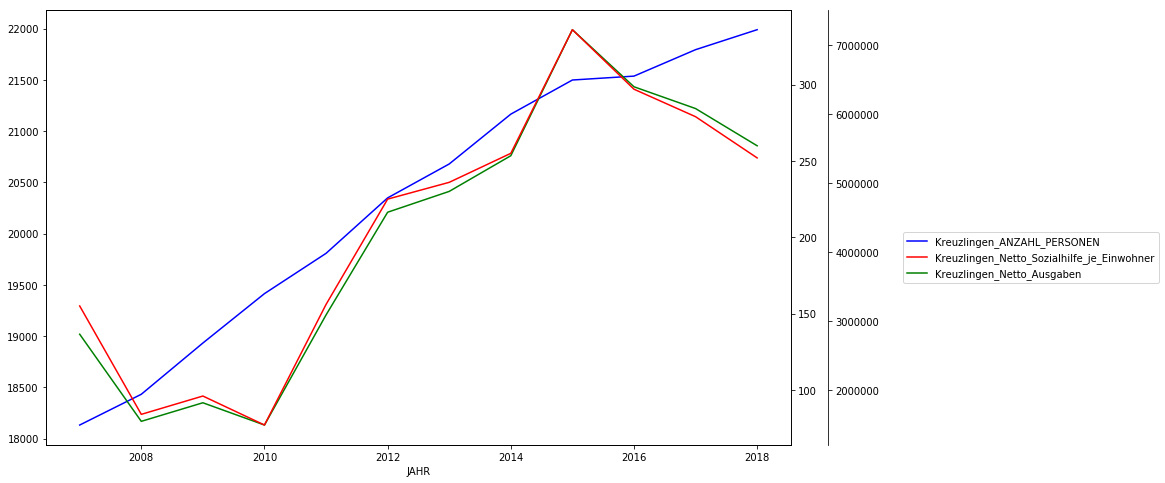

In [14]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(18)
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

Kreuzlingen.Kreuzlingen_ANZAHL_PERSONEN.plot(x='JAHR', ax=ax, style='b-')
# same ax as above since it's automatically added on the right
Kreuzlingen.Kreuzlingen_Netto_Sozialhilfe_je_Einwohner.plot(x='JAHR', ax=ax, style='r-', secondary_y=True)
Kreuzlingen.Kreuzlingen_Netto_Ausgaben.plot(x='JAHR', ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['Kreuzlingen_ANZAHL_PERSONEN','Kreuzlingen_Netto_Sozialhilfe_je_Einwohner','Kreuzlingen_Netto_Ausgaben'], bbox_to_anchor=(1.5, 0.5))

### Arbon

<Figure size 432x288 with 0 Axes>

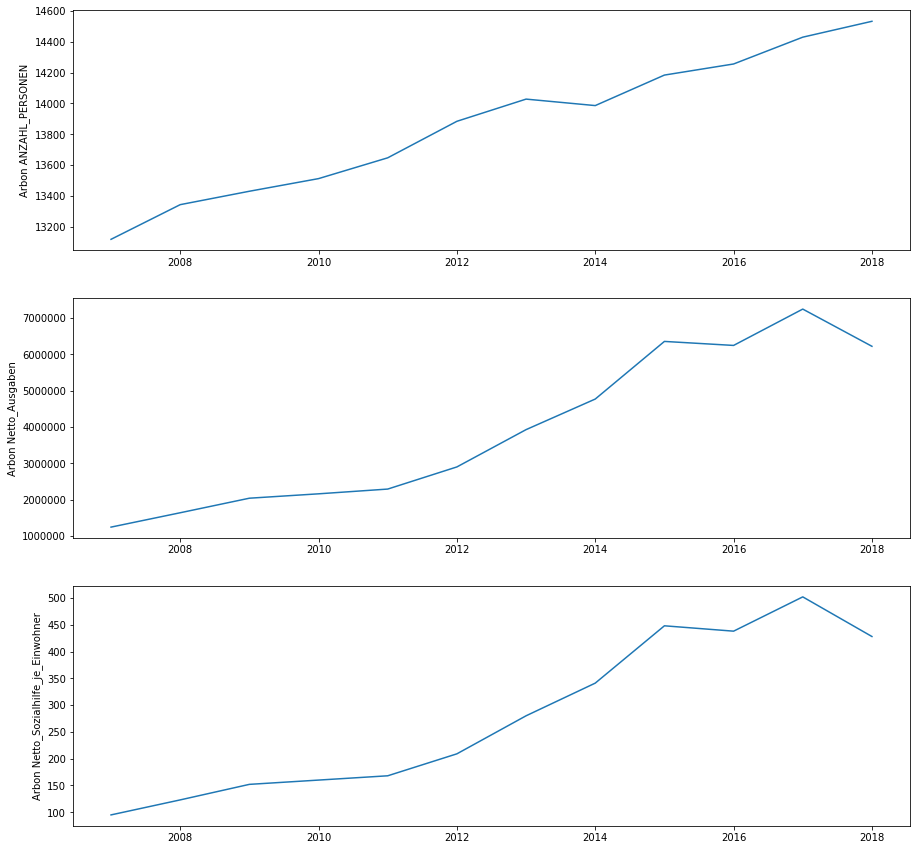

In [15]:
plt.figure();
f, axes = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(15)
axes[0].plot(Arbon['JAHR'], Arbon['ANZAHL_PERSONEN'])
axes[0].set_ylabel('Arbon ANZAHL_PERSONEN');

axes[1].plot(Arbon['JAHR'], Arbon['Netto_Ausgaben'])
axes[1].set_ylabel('Arbon Netto_Ausgaben');

axes[2].plot(Arbon['JAHR'], Arbon['Netto_Sozialhilfe_je_Einwohner'])
axes[2].set_ylabel('Arbon Netto_Sozialhilfe_je_Einwohner');

In [16]:
Arbon.rename(columns={'Key':'Arbon_Key',
                           'BFS_NR_GEMEINDE':'Arbon_BFS_NR_GEMEINDE',
                            'ANZAHL_PERSONEN':'Arbon_ANZAHL_PERSONEN',
                            'Netto_Sozialhilfe_je_Einwohner':'Arbon_Netto_Sozialhilfe_je_Einwohner',
                            'Netto_Ausgaben':'Arbon_Netto_Ausgaben'
                           }, inplace=True)
Arbon.sort_values(by='JAHR', inplace=True)
Arbon.set_index('JAHR', inplace=True)

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



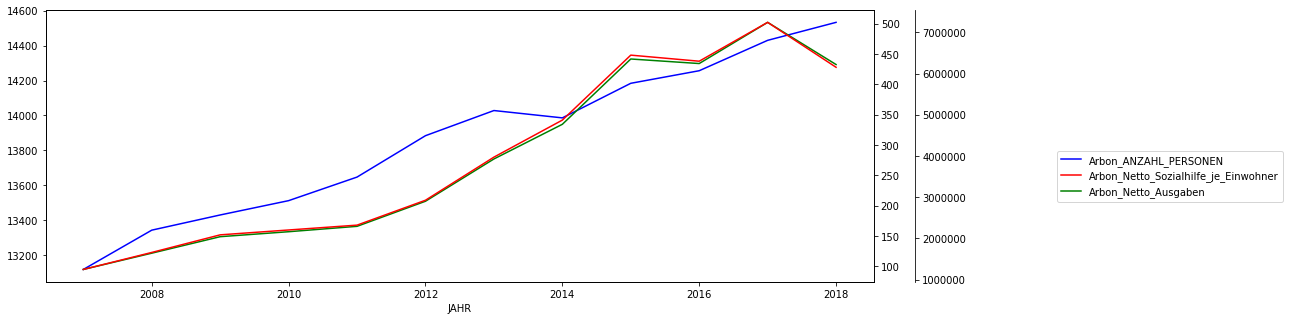

In [17]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(20)
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

Arbon.Arbon_ANZAHL_PERSONEN.plot(x='JAHR', ax=ax, style='b-')
# same ax as above since it's automatically added on the right
Arbon.Arbon_Netto_Sozialhilfe_je_Einwohner.plot(x='JAHR', ax=ax, style='r-', secondary_y=True)
Arbon.Arbon_Netto_Ausgaben.plot(x='JAHR', ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['Arbon_ANZAHL_PERSONEN','Arbon_Netto_Sozialhilfe_je_Einwohner','Arbon_Netto_Ausgaben'], bbox_to_anchor=(1.5, 0.5))

### Amriswil

<Figure size 432x288 with 0 Axes>

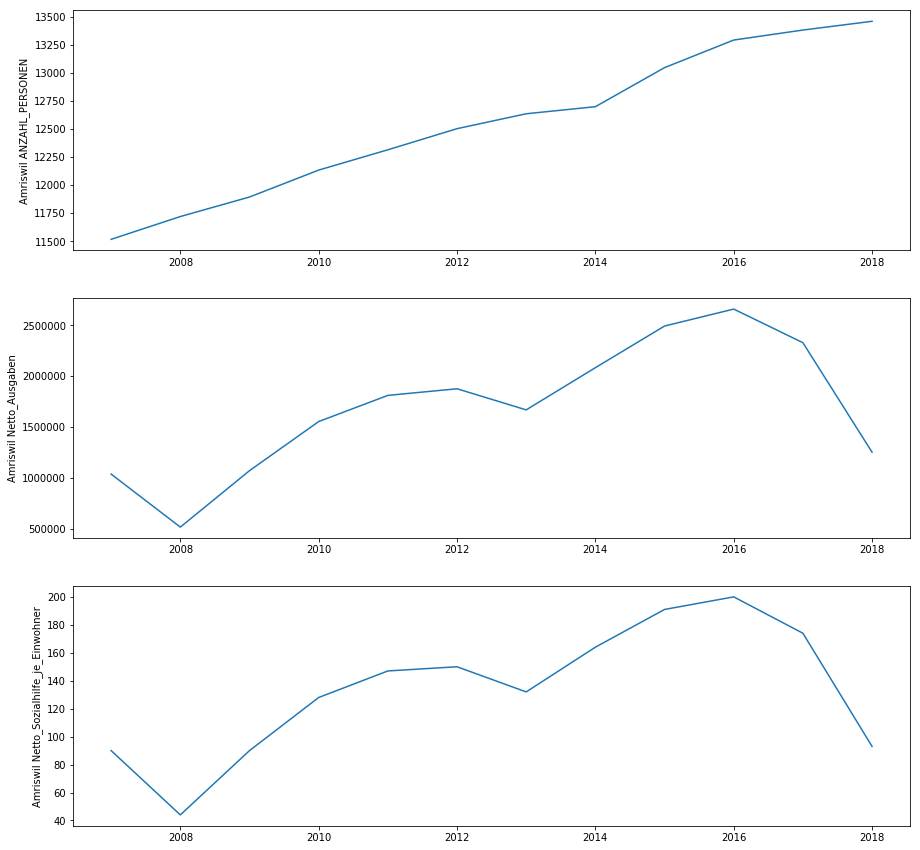

In [18]:
plt.figure();
f, axes = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(15)
axes[0].plot(Amriswil['JAHR'], Amriswil['ANZAHL_PERSONEN'])
axes[0].set_ylabel('Amriswil ANZAHL_PERSONEN');

axes[1].plot(Amriswil['JAHR'], Amriswil['Netto_Ausgaben'])
axes[1].set_ylabel('Amriswil Netto_Ausgaben');

axes[2].plot(Amriswil['JAHR'], Amriswil['Netto_Sozialhilfe_je_Einwohner'])
axes[2].set_ylabel('Amriswil Netto_Sozialhilfe_je_Einwohner');

In [19]:
Amriswil.rename(columns={'Key':'Amriswil_Key',
                           'BFS_NR_GEMEINDE':'Amriswil_BFS_NR_GEMEINDE',
                            'ANZAHL_PERSONEN':'Amriswil_ANZAHL_PERSONEN',
                            'Netto_Sozialhilfe_je_Einwohner':'Amriswil_Netto_Sozialhilfe_je_Einwohner',
                            'Netto_Ausgaben':'Amriswil_Netto_Ausgaben'
                           }, inplace=True)
Amriswil.sort_values(by='JAHR', inplace=True)
Amriswil.set_index('JAHR', inplace=True)

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



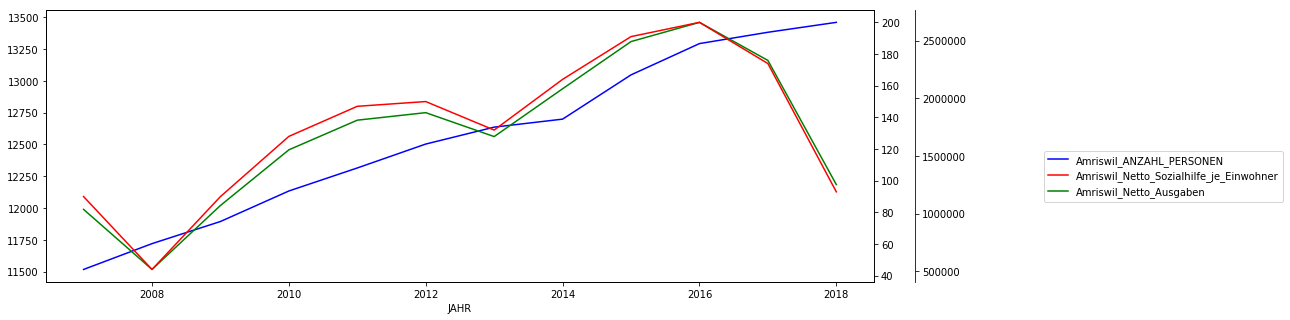

In [20]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(20)
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

Amriswil.Amriswil_ANZAHL_PERSONEN.plot(x='JAHR', ax=ax, style='b-')
# same ax as above since it's automatically added on the right
Amriswil.Amriswil_Netto_Sozialhilfe_je_Einwohner.plot(x='JAHR', ax=ax, style='r-', secondary_y=True)
Amriswil.Amriswil_Netto_Ausgaben.plot(x='JAHR', ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['Amriswil_ANZAHL_PERSONEN','Amriswil_Netto_Sozialhilfe_je_Einwohner','Amriswil_Netto_Ausgaben'], bbox_to_anchor=(1.5, 0.5))

### Weinfelden

<Figure size 432x288 with 0 Axes>

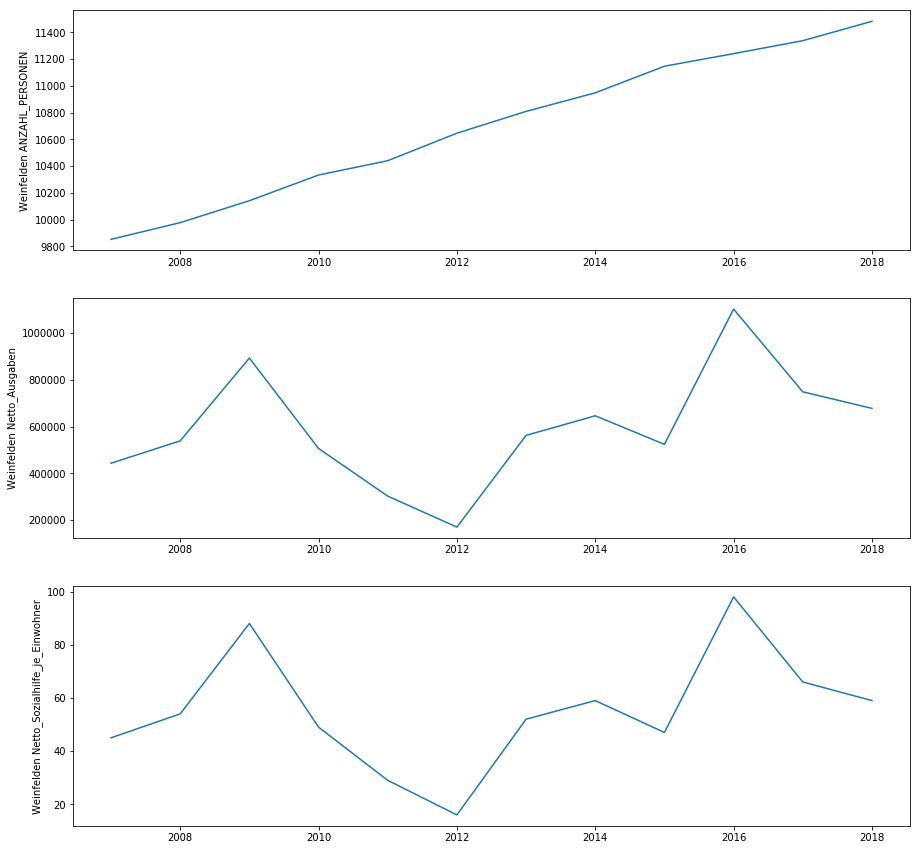

In [21]:
plt.figure();
f, axes = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(15)
axes[0].plot(Weinfelden['JAHR'], Weinfelden['ANZAHL_PERSONEN'])
axes[0].set_ylabel('Weinfelden ANZAHL_PERSONEN');

axes[1].plot(Weinfelden['JAHR'], Weinfelden['Netto_Ausgaben'])
axes[1].set_ylabel('Weinfelden Netto_Ausgaben');

axes[2].plot(Weinfelden['JAHR'], Weinfelden['Netto_Sozialhilfe_je_Einwohner'])
axes[2].set_ylabel('Weinfelden Netto_Sozialhilfe_je_Einwohner');

In [22]:
Weinfelden.rename(columns={'Key':'Weinfelden_Key',
                           'BFS_NR_GEMEINDE':'Weinfelden_BFS_NR_GEMEINDE',
                            'ANZAHL_PERSONEN':'Weinfelden_ANZAHL_PERSONEN',
                            'Netto_Sozialhilfe_je_Einwohner':'Weinfelden_Netto_Sozialhilfe_je_Einwohner',
                            'Netto_Ausgaben':'Weinfelden_Netto_Ausgaben'
                           }, inplace=True)
Weinfelden.sort_values(by='JAHR', inplace=True)
Weinfelden.set_index('JAHR', inplace=True)

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/pascal-baur/anaconda2/envs/data_analysis36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



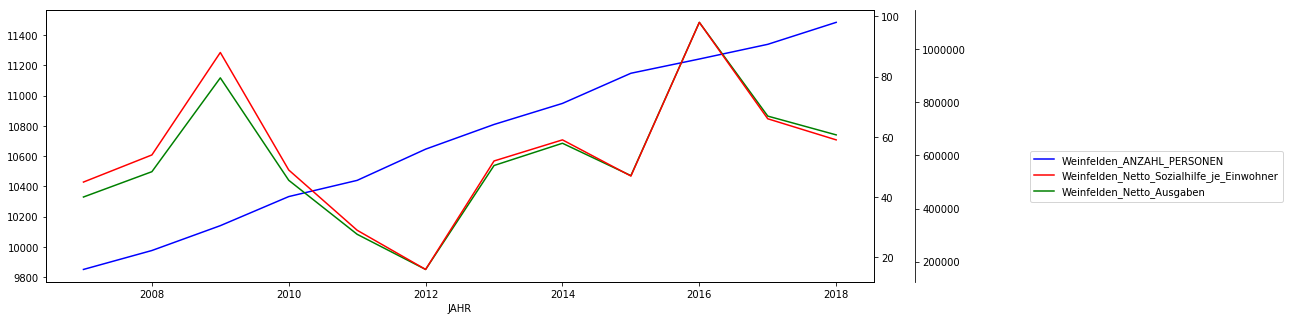

In [23]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(20)
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

Weinfelden.Weinfelden_ANZAHL_PERSONEN.plot(x='JAHR', ax=ax, style='b-')
# same ax as above since it's automatically added on the right
Weinfelden.Weinfelden_Netto_Sozialhilfe_je_Einwohner.plot(x='JAHR', ax=ax, style='r-', secondary_y=True)
Weinfelden.Weinfelden_Netto_Ausgaben.plot(x='JAHR', ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['Weinfelden_ANZAHL_PERSONEN','Weinfelden_Netto_Sozialhilfe_je_Einwohner','Weinfelden_Netto_Ausgaben'], bbox_to_anchor=(1.5, 0.5))

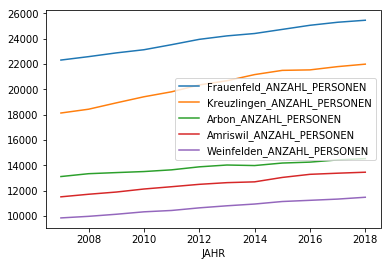

In [24]:
#Vergleich Anzahl Personen
dfs = [Frauenfeld, Kreuzlingen, Arbon, Amriswil, Weinfelden]
Top5_df_pers = reduce(lambda left,right: pd.merge(left,right,on='JAHR'), dfs)
Top5_df_pers = Top5_df_pers.filter(regex='ANZAHL')
Top5_df_pers.plot()
Top5_df_pers.iplot()

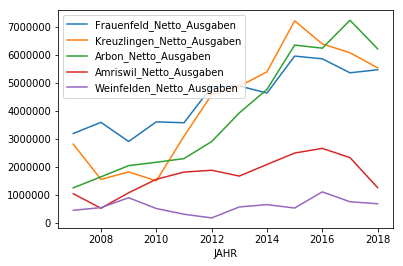

In [25]:
#Vergleich Netto Ausgaben
dfs = [Frauenfeld, Kreuzlingen, Arbon, Amriswil, Weinfelden]
Top5_df_ausgaben = reduce(lambda left,right: pd.merge(left,right,on='JAHR'), dfs)
Top5_df_ausgaben = Top5_df_ausgaben.filter(regex='Netto_Ausgaben')
Top5_df_ausgaben.plot()
Top5_df_ausgaben.iplot()

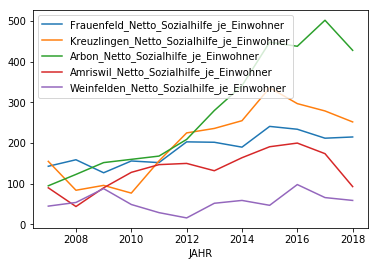

In [26]:
#Vergleich Netto Ausgaben
dfs = [Frauenfeld, Kreuzlingen, Arbon, Amriswil, Weinfelden]
Top5_df_soz = reduce(lambda left,right: pd.merge(left,right,on='JAHR'), dfs)
Top5_df_soz = Top5_df_soz.filter(regex='Netto_Sozialhilfe_je_Einwohner')
Top5_df_soz.plot()
Top5_df_soz.iplot()